# **Previsão de Doença Cardíaca com Aprendizado de Máquina: Um Estudo com Dados Clínicos da UCI (University of California, Irvine)**

---

# Contexto

As **doenças cardíacas** são uma das **principais causas de morte no mundo**. Em 2022, aproximadamente **19,8 milhões de pessoas** morreram devido a doenças cardiovasculares globalmente [(PAHO)](https://www.paho.org/pt/topicos/doencas-cardiovasculares), [(Revista Pesquisa Fapesp)](https://revistapesquisa.fapesp.br/cerca-de-400-mil-pessoas-morreram-em-2022-no-brasil-por-problemas-cardiovasculares/)​.
​

O objetivo deste projeto é prever a **presença ou ausência de doença cardíaca** em pacientes com base em diversas **características clínicas**. A análise é realizada usando um conjunto de **dados de um estudo cardíaco** da  [Universidade da Califórnia, Irvine (UCI).](https://archive.ics.uci.edu/)

# 1\. Pré-processamento dos Dados

Primeiramente, precisamos das ferramentas certas para trabalhar. Importamos bibliotecas essenciais para manipulação de dados (**pandas**, **numpy**), para visualização (**matplotlib**, **seaborn**), e para construção e avaliação de modelos de machine learning (**sklearn**).

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Em seguida, pegamos os dados sobre **doenças cardíacas** disponíveis em um arquivo no **repositório de Machine Learning da UCI**. Então, damos **nomes adequados às colunas** para facilitar o entendimento.

In [ ]:
# Carregando o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
colunas = ["idade", "sexo", "tipo_dor_no_peito", "pressao_arterial_repouso", "colesterol", "acucar_no_sangue_jejum",
           "resultado_eletrocardiograma", "frequencia_cardiaca_maxima", "angina_exercicio", "depressao_st",
           "inclinacao_st", "vasos_coloridos", "talassemia", "alvo"]
dados = pd.read_csv(url, names=colunas)
dados.head()


,idade,sexo,tipo_dor_no_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_jejum,resultado_eletrocardiograma,frequencia_cardiaca_maxima,angina_exercicio,depressao_st,inclinacao_st,vasos_coloridos,talassemia,alvo
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 1.1 Valores Faltantes

Antes de qualquer coisa, verificamos se há **valores faltantes nos dados**, pois esses podem atrapalhar nosso modelo.

In [ ]:
# Verificando se há dados faltantes
print(dados.isna().sum())


idade                          0
sexo                           0
tipo_dor_no_peito              0
pressao_arterial_repouso       0
colesterol                     0
acucar_no_sangue_jejum         0
resultado_eletrocardiograma    0
frequencia_cardiaca_maxima     0
angina_exercicio               0
depressao_st                   0
inclinacao_st                  0
vasos_coloridos                0
talassemia                     0
alvo                           0
dtype: int64


Descobrimos que os dados têm alguns valores representados por "?" que precisam ser tratados. Então, **substituímos esses "?" por NaN** (Not a Number) e convertemos todas as **colunas para valores numéricos.**

In [ ]:
# Convertendo colunas para o tipo adequado
dados.replace("?", np.nan, inplace=True)
dados = dados.apply(pd.to_numeric)


Depois disso, verificamos novamente se ainda há valores faltantes.

In [ ]:
# Verificando novamente se há dados faltantes após conversão
print("\nDados faltantes após conversão:")
print(dados.isna().sum())



Dados faltantes após conversão:
idade                          0
sexo                           0
tipo_dor_no_peito              0
pressao_arterial_repouso       0
colesterol                     0
acucar_no_sangue_jejum         0
resultado_eletrocardiograma    0
frequencia_cardiaca_maxima     0
angina_exercicio               0
depressao_st                   0
inclinacao_st                  0
vasos_coloridos                4
talassemia                     2
alvo                           0
dtype: int64


Para simplificar, removemos todas as linhas que ainda contenham valores faltantes.

In [ ]:
# Removendo linhas com valores faltantes
dados.dropna(inplace=True)


E verificamos mais uma vez para garantir que não há mais valores faltantes.

In [ ]:
# Verificando novamente se há dados faltantes após remoção
print("\nDados faltantes após remoção:")
print(dados.isna().sum())



Dados faltantes após remoção:
idade                          0
sexo                           0
tipo_dor_no_peito              0
pressao_arterial_repouso       0
colesterol                     0
acucar_no_sangue_jejum         0
resultado_eletrocardiograma    0
frequencia_cardiaca_maxima     0
angina_exercicio               0
depressao_st                   0
inclinacao_st                  0
vasos_coloridos                0
talassemia                     0
alvo                           0
dtype: int64


### 1.2 Análise das Variáveis

Agora, vamos **explorar** como os dados estão **distribuídos**. Criamos gráficos para **visualizar** a distribuição das **variáveis numéricas.**

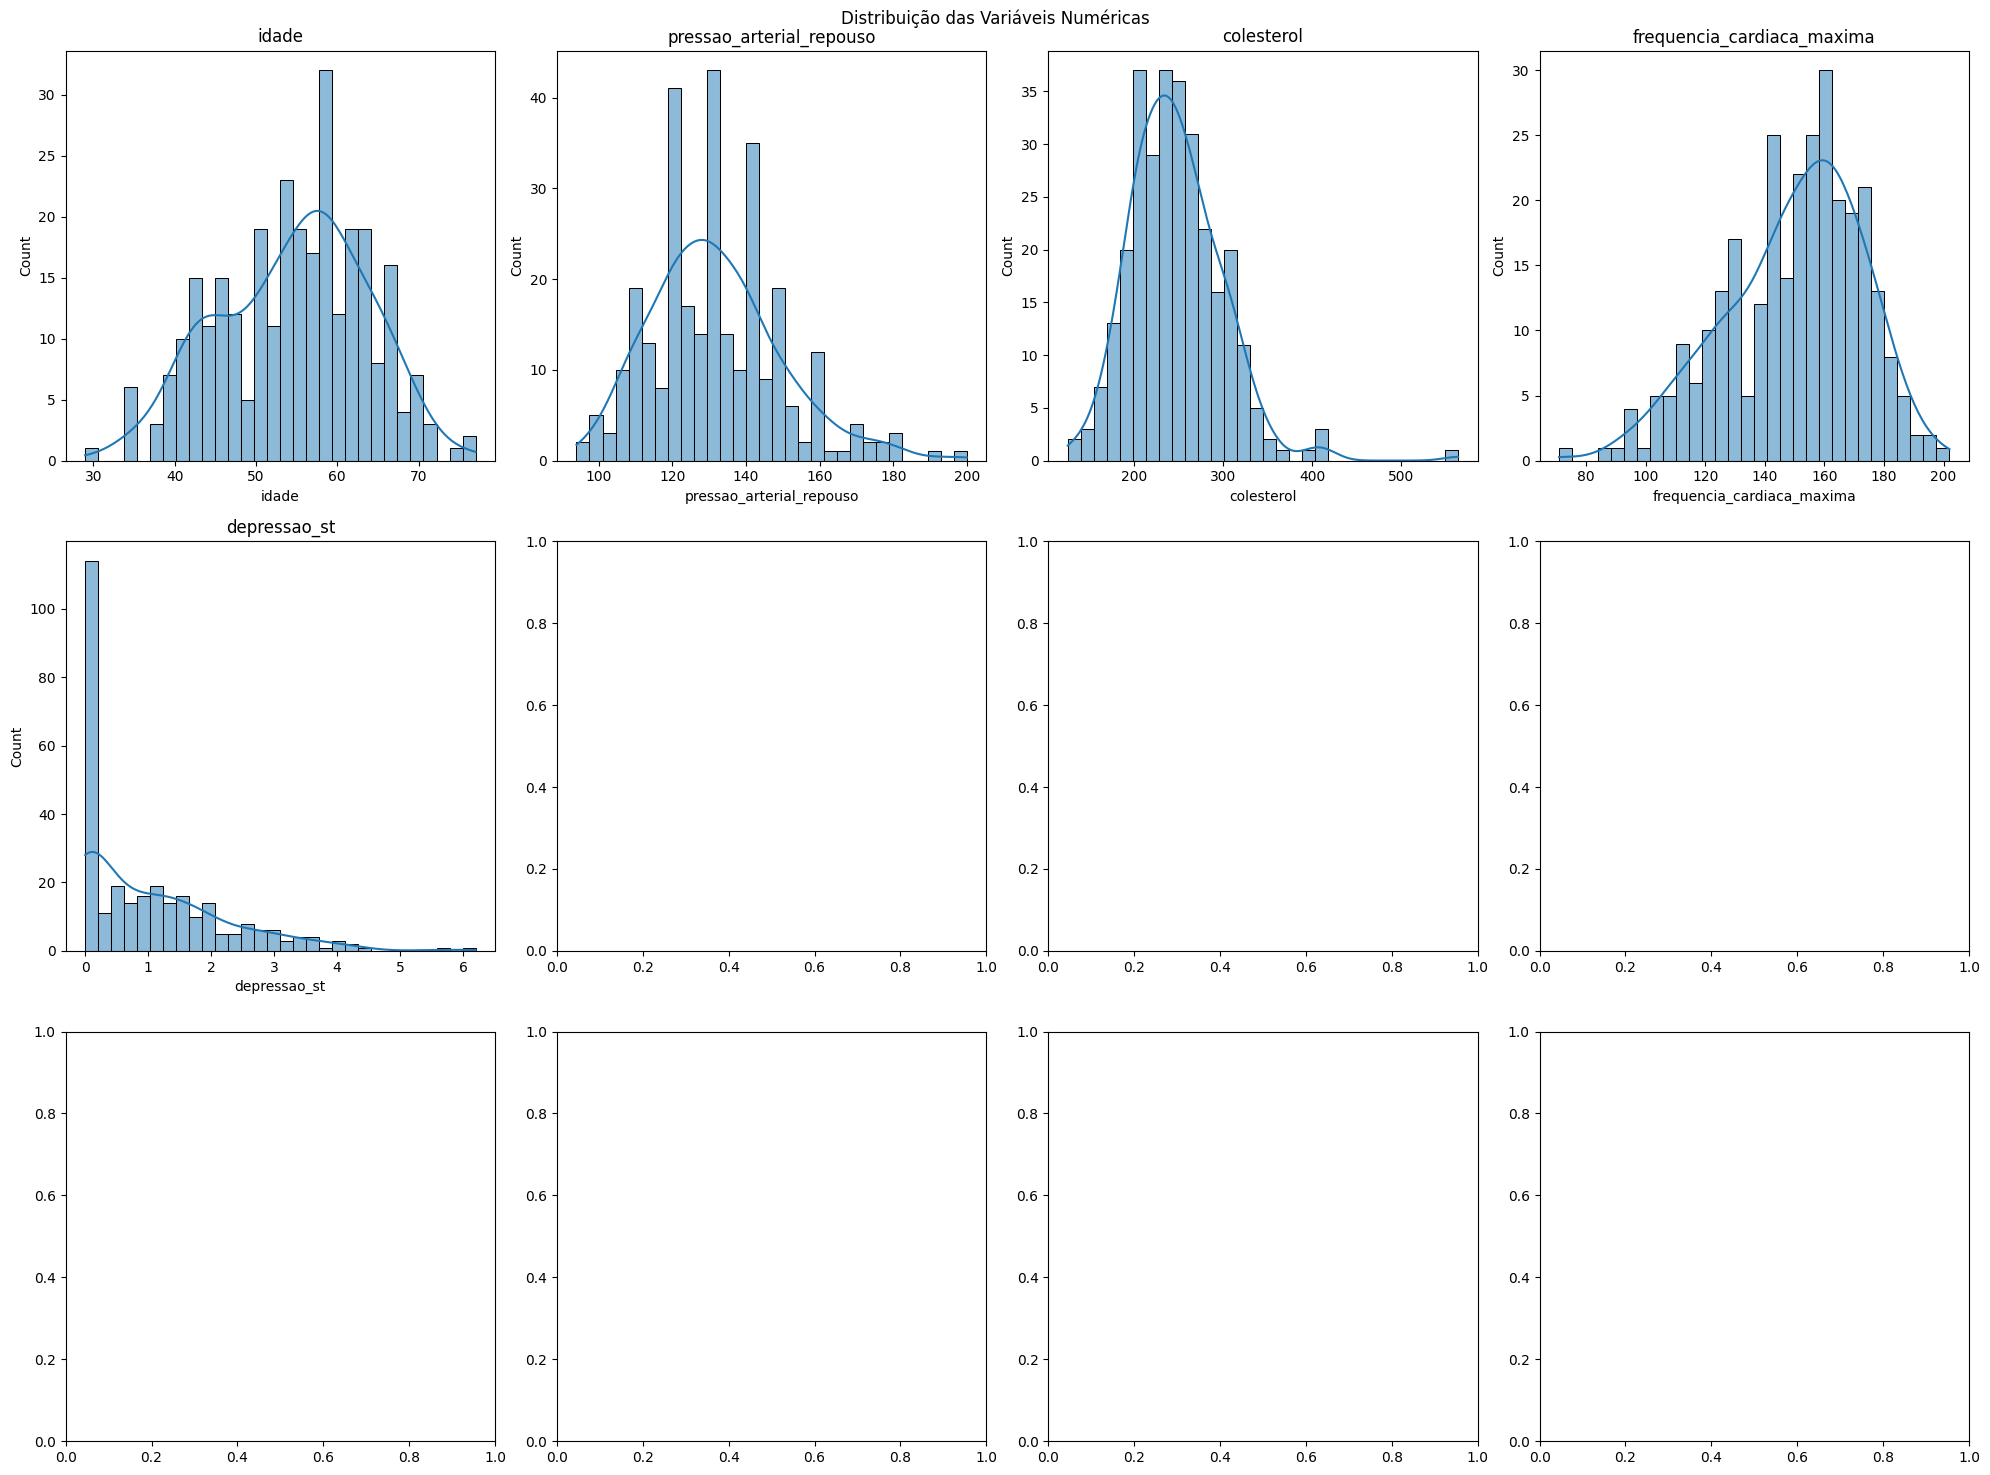

In [ ]:
# Visualizando a distribuição das variáveis numéricas
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Distribuição das Variáveis Numéricas')

variaveis_numericas = ["idade", "pressao_arterial_repouso", "colesterol", "frequencia_cardiaca_maxima", "depressao_st"]

for i, col in enumerate(variaveis_numericas):
    sns.histplot(dados[col], bins=30, kde=True, ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

**Insights**:
- Idade: A maioria dos pacientes tem idade entre 50 e 60 anos.
- Pressão Arterial em Repouso: A maior parte dos pacientes tem pressão arterial entre 120 e 140 mmHg.
- Colesterol: A maioria dos pacientes tem um nível de colesterol entre 200 e 300 mg/dL.
- Frequência Cardíaca Máxima: A maioria dos pacientes tem uma frequência cardíaca máxima entre 140 e 160 bpm.
- Depressão ST: A maioria dos pacientes tem uma depressão ST menor que 1.

A seguir, fazemos o mesmo para as **variáveis categóricas.**

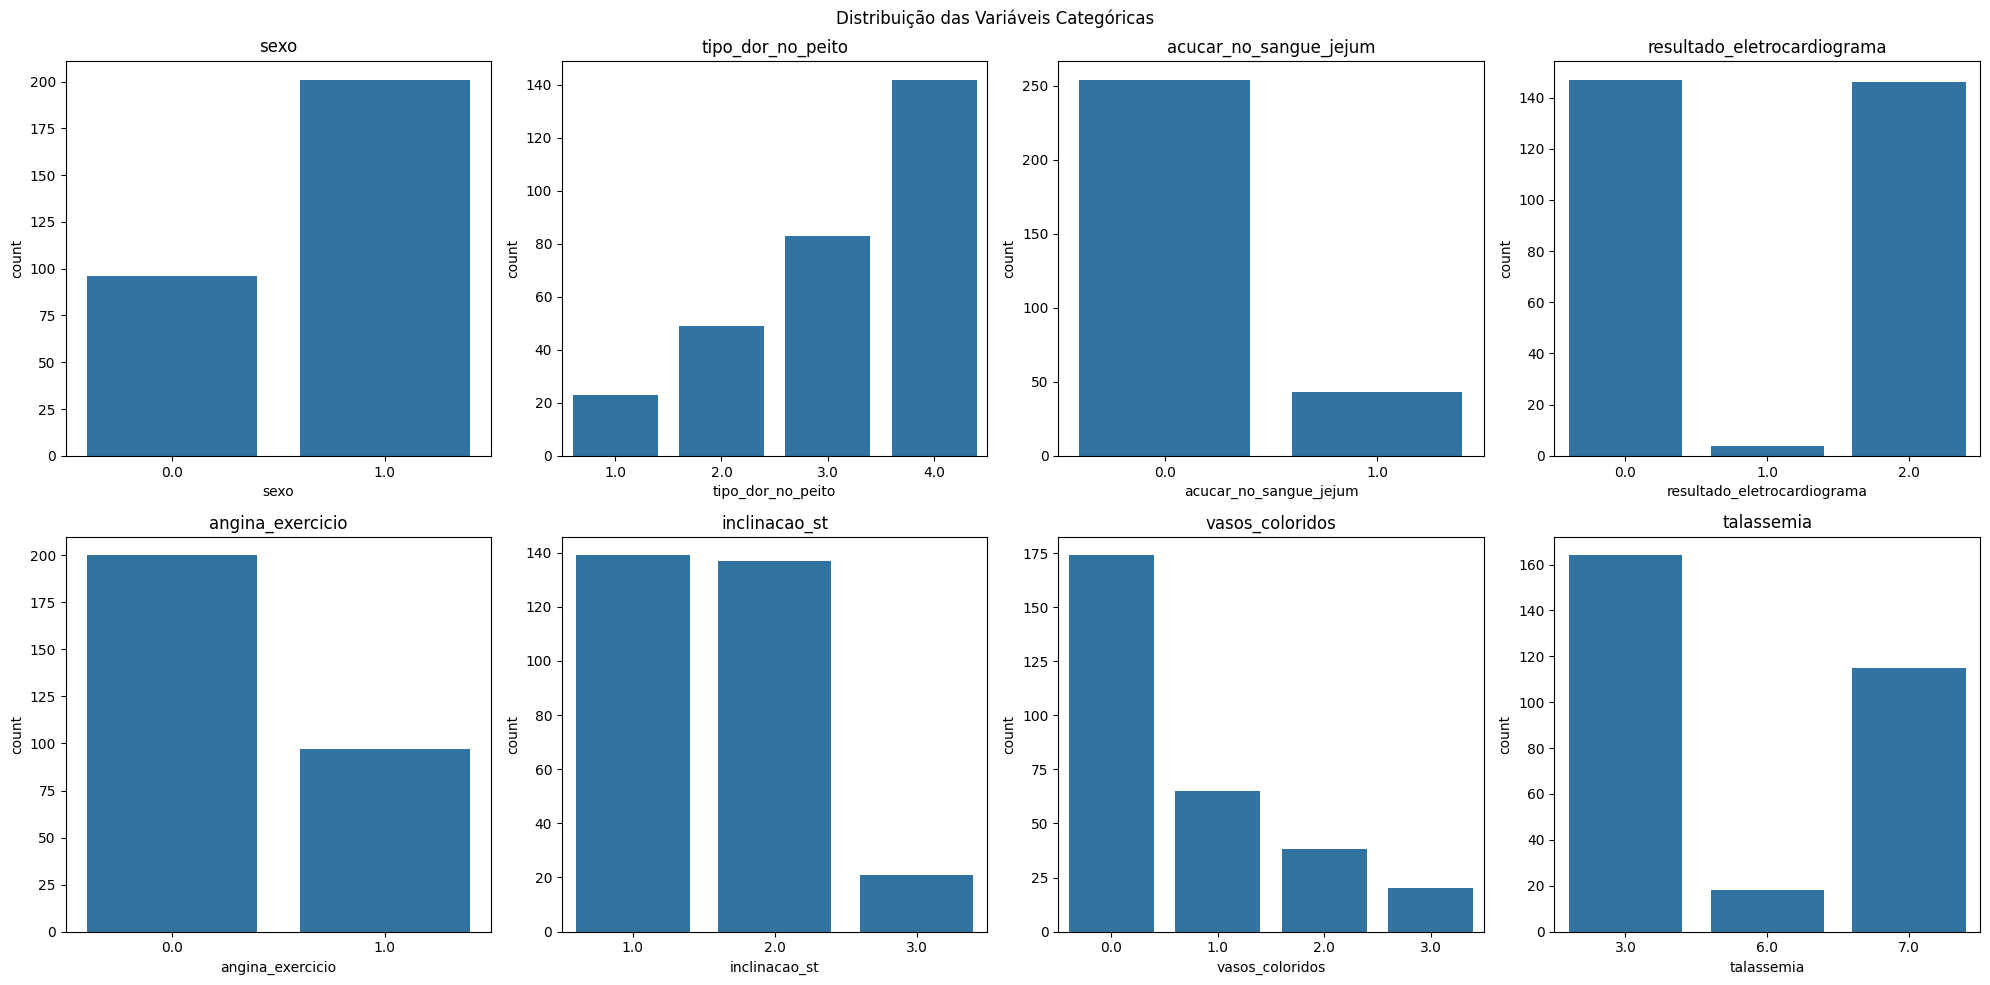

In [ ]:
# Visualizando a distribuição das variáveis categóricas
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuição das Variáveis Categóricas')

variaveis_categoricas = ["sexo", "tipo_dor_no_peito", "acucar_no_sangue_jejum", "resultado_eletrocardiograma",
                         "angina_exercicio", "inclinacao_st", "vasos_coloridos", "talassemia"]

for i, col in enumerate(variaveis_categoricas):
    sns.countplot(x=dados[col], ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

**Insights**:
- Sexo: Há mais homens (sexo=1) do que mulheres (sexo=0) no dataset.
- Tipo de dor no peito: A maioria dos pacientes possui tipo de dor no peito categoria 3.
- Açúcar no sangue em jejum: A maioria dos pacientes não tem açúcar no sangue em jejum (açúcar_no_sangue_jejum=0).
- Resultado eletrocardiograma: A maioria dos pacientes tem resultado eletrocardiograma categoria 0 ou 2.
- Angina de esforço: A maioria dos pacientes não tem angina de esforço (angina_exercicio=0).
- Inclinação ST: A maioria dos pacientes tem inclinação ST categoria 1.
- Vasos coloridos: A maioria dos pacientes tem 0 vasos coloridos.
- Talassemia: A maioria dos pacientes tem talassemia categoria 3.

Para entender como as **variáveis numéricas** se relacionam entre si, criamos um **mapa de calor de correlação**.

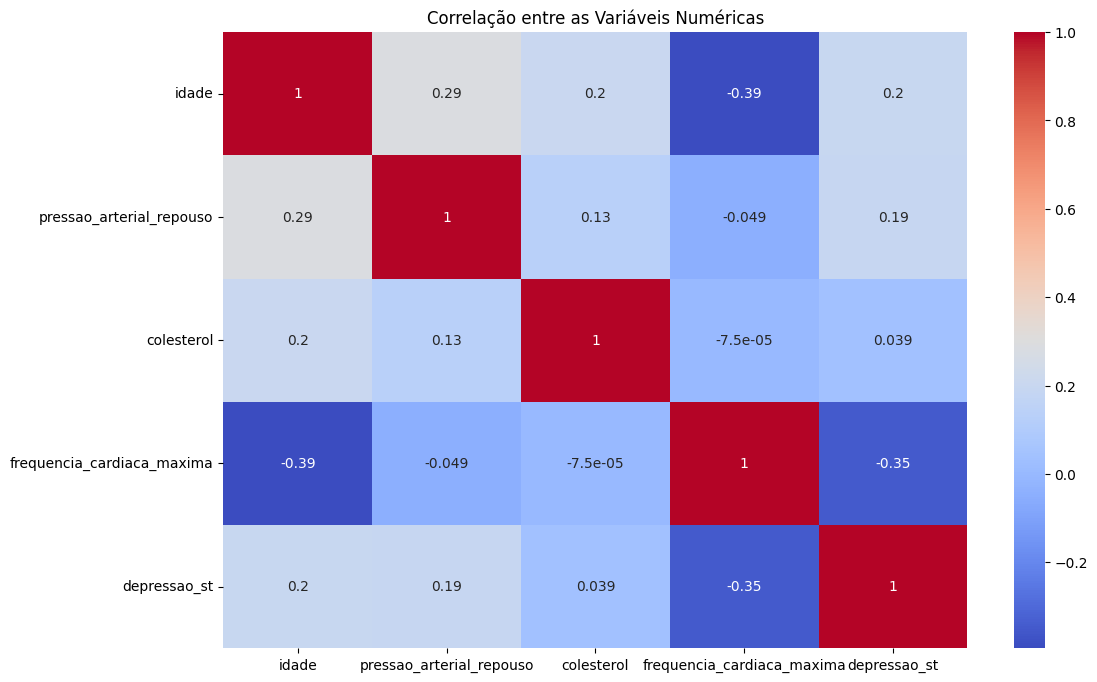

In [ ]:
# Visualizando a correlação entre as variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(dados[variaveis_numericas].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Variáveis Numéricas')
plt.show()

**Insights**:
- Idade e Colesterol: Existe uma correlação positiva fraca entre idade e colesterol, o que significa que pessoas mais velhas tendem a ter níveis de colesterol ligeiramente mais altos.
- Idade e Frequência Cardíaca Máxima: Existe uma correlação negativa fraca entre idade e frequência cardíaca máxima, indicando que pessoas mais velhas tendem a ter uma frequência cardíaca máxima ligeiramente menor.
- Pressão Arterial em Repouso e Colesterol: Existe uma correlação fraca (quase nula) entre pressão arterial em repouso e colesterol.
- Frequência Cardíaca Máxima e Depressão ST: Existe uma correlação negativa moderada entre frequência cardíaca máxima e depressão ST.

# 2\. Divisão do Dataset

### 2.1 Divisão do Dataset em Features e Target

Agora, **separamos os dados** em duas partes: **as features** (variáveis independentes) **e o alvo** (variável que queremos prever).

In [ ]:
# Cria um novo DataFrame X que contém todas as colunas do DataFrame original dados, exceto a coluna "alvo"
X = dados.drop("alvo", axis=1)

# Seleciona a coluna "alvo" do DataFrame dados e a armazena em y.
y = dados["alvo"]


Convertemos a **variável alvo em binária**, onde **1 indica a presença de doença cardíaca e 0 a ausência.**

In [ ]:
# Convertendo alvo para binário (0 ou 1)
y = y.apply(lambda x: 1 if x > 0 else 0)


Para preparar os dados para o modelo, aplicamos algumas **transformações**: **imputação** de valores faltantes, **padronização** para variáveis numéricas e **codificação one-hot** para variáveis categóricas.

In [ ]:
# Conversão de dados categóricos
preprocessador = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), variaveis_numericas),
        ('cat', OneHotEncoder(), variaveis_categoricas)
    ]
)

X_preprocessado = preprocessador.fit_transform(X)


### 2.2 Divisão do Dataset em Treinamento e Teste

Dividimos os dados em duas partes: **70% para treinamento e 30% para teste.**

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_preprocessado, y, test_size=0.3, random_state=42)


# 3\. Treinamento do Modelo

Escolhemos um modelo de **Árvore de Decisão** e o treinamos com os dados de treinamento.

In [ ]:
# Treinando o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)


DecisionTreeClassifier(random_state=42)

# 4\. Avaliação do Modelo

Utilizamos o **modelo treinado** para fazer **predições** com os dados de teste.

In [ ]:
# Fazendo predições
y_pred = modelo.predict(X_teste)


Calculamos e imprimimos várias **métricas de desempenho** do modelo: **acurácia, matriz de confusão** e **relatório de classificação.**

In [ ]:
# Avaliando a performance do modelo
acuracia = accuracy_score(y_teste, y_pred)
matriz_confusao = confusion_matrix(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print("Acurácia:", acuracia)
print("Matriz de Confusão:\n", matriz_confusao)
print("Relatório de Classificação:\n", relatorio_classificacao)



Acurácia: 0.7
Matriz de Confusão:
 [[34 15]
 [12 29]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72        49
           1       0.66      0.71      0.68        41

    accuracy                           0.70        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.70      0.70      0.70        90



# 5\. Interpretação dos Resultados

Para entender quais **variáveis mais influenciam** o modelo, **calculamos a importância das features.**

In [ ]:
# Analisando a importância das features
importancia_features = modelo.feature_importances_
nomes_features = variaveis_numericas + list(preprocessador.transformers_[1][1].get_feature_names_out(variaveis_categoricas))
importancia_df = pd.DataFrame({'Variável': nomes_features, 'Importância': importancia_features}).sort_values(by='Importância', ascending=False)

print("Importância das Variáveis:\n", importancia_df)

Importância das Variáveis:
                            Variável  Importância
21              vasos_coloridos_0.0     0.283847
1          pressao_arterial_repouso     0.124791
2                        colesterol     0.124681
4                      depressao_st     0.099614
10            tipo_dor_no_peito_4.0     0.096766
25                   talassemia_3.0     0.086797
0                             idade     0.064842
3        frequencia_cardiaca_maxima     0.049290
8             tipo_dor_no_peito_2.0     0.019187
15  resultado_eletrocardiograma_2.0     0.018131
24              vasos_coloridos_3.0     0.017483
19                inclinacao_st_2.0     0.014569
23              vasos_coloridos_2.0     0.000000
18                inclinacao_st_1.0     0.000000
22              vasos_coloridos_1.0     0.000000
20                inclinacao_st_3.0     0.000000
26                   talassemia_6.0     0.000000
14  resultado_eletrocardiograma_1.0     0.000000
17             angina_exercicio_1.0     0

### 5.1 Análise de Importância das Variáveis

**Variáveis importantes:**

As variáveis "vasos_coloridos_0.0", "pressao_arterial_repouso", "colesterol", "depressao_st" e "tipo_dor_no_peito_4.0" são as features mais importantes para prever a presença de doenças cardíacas.<br><br>

**Variáveis irrelevantes:**

As variáveis "sexo_0.0", "sexo_1.0", "tipo_dor_no_peito_1.0", "tipo_dor_no_peito_3.0", "acucar_no_sangue_jejum_0.0", "acucar_no_sangue_jejum_1.0", "resultado_eletrocardiograma_0.0", "angina_exercicio_0.0", "angina_exercicio_1.0", "resultado_eletrocardiograma_1.0", "talassemia_6.0", "inclinacao_st_1.0", "inclinacao_st_2.0", "inclinacao_st_3.0", "vasos_coloridos_1.0", "vasos_coloridos_2.0", "vasos_coloridos_3.0", "talassemia_7.0" possuem importância 0, ou seja, o modelo as considera irrelevantes para a previsão do alvo.

Criamos um mapa de calor para visualizar a **matriz de confusão**, que mostra a **quantidade de acertos e erros do modelo.**

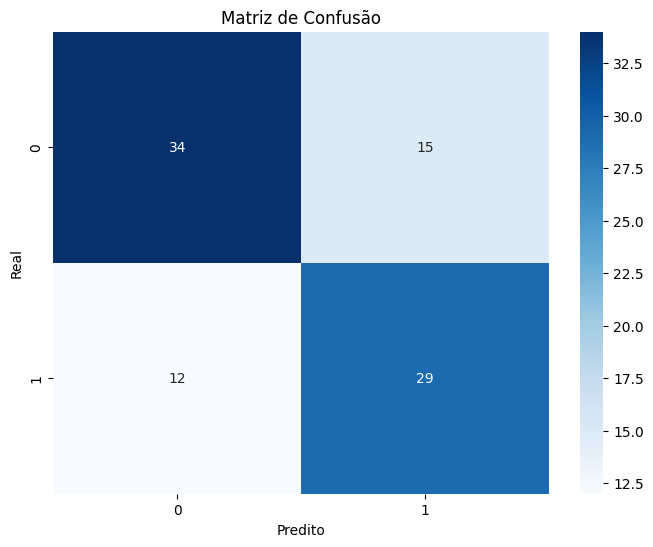

In [ ]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

Criamos um scatterplot para **comparar as predições do modelo com os valores reais**, permitindo visualizar a **precisão do modelo**.

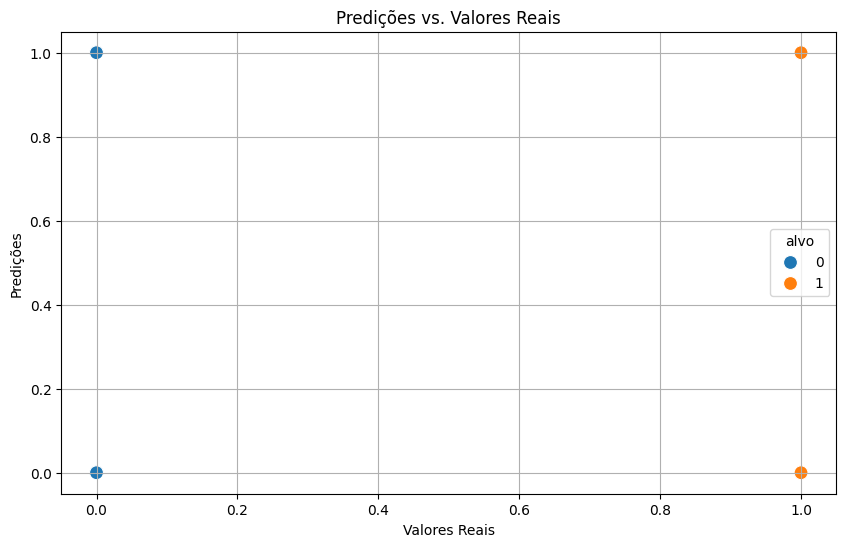

In [ ]:
# Visualizando as predições vs. valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste, y=y_pred, hue=y_teste, s=100)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Predições vs. Valores Reais')
plt.grid(True)
plt.show()

### 5.2 Considerações

A **análise da importância** das features indica que o modelo de **Árvore de Decisão** considerou a presença de **0 vasos coloridos (vasos_coloridos_0.0)** como a feature **mais importante.** Pressão arterial em repouso, colesterol e depressão ST também são consideradas importantes. **As variáveis com importância 0 são consideradas irrelevantes** para o modelo e poderiam ser removidas para simplificar o modelo sem afetar significativamente sua performance.<br><br>

O **gráfico scatterplot** gerado mostra a **relação entre as predições e os valores reais**, permitindo visualizar se o modelo está fazendo **previsões corretas** e se há algum **padrão nas previsões.**
Adicionalmente, a **matriz de confusão** gerada pelo código fornece **informações mais detalhadas** sobre a performance do modelo.